In [1]:
import yaml

In [2]:
with open("data/unbiased_free_energies.yaml", 'r') as stream:
    x = yaml.load(stream)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
rooh_dg = []
rooh_uncert = []
for element in x['RoOH']['all_free_energies'][10:]:
    rooh_dg.append(element[0])
    rooh_uncert.append(element[1])
    
ro8_dg = []
ro8_uncert = []
for element in x['Roeight']['all_free_energies'][10:]:
    ro8_dg.append(element[0])
    ro8_uncert.append(element[1])
    
ro6_dg = []
ro6_uncert = []
for element in x['Roasix']['all_free_energies'][10:]:
    ro6_dg.append(element[0])
    ro6_uncert.append(element[1])
    
x_axis = x['distance cutoff (nm)'][10:]
x_axis = [dist * 10 for dist in x_axis]

In [5]:
x_axis


[20.0,
 18.0,
 15.999999999999996,
 14.0,
 11.999999999999996,
 10.0,
 7.999999999999998,
 5.9999999999999964,
 3.999999999999999]

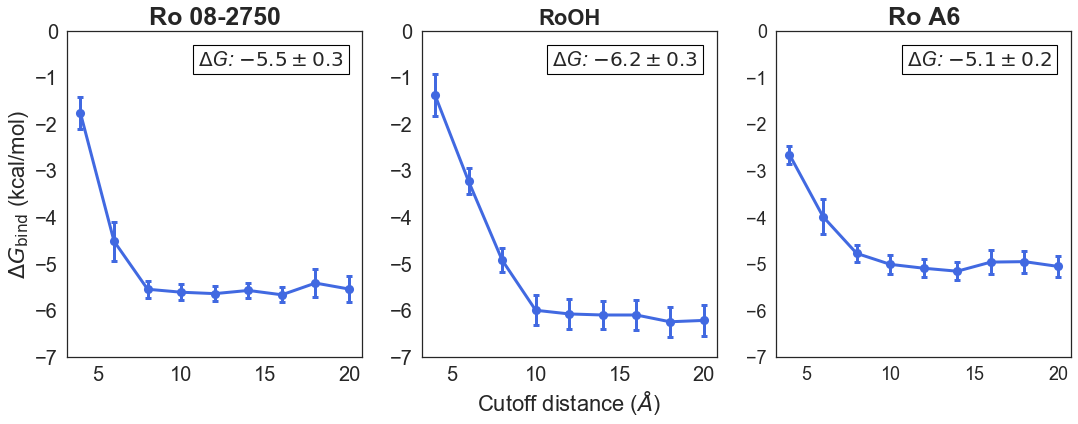

In [6]:
sns.set_style('white')
sns.set_context('talk')
fig = plt.figure(figsize=(18,6))

# plot Ro8 free energy and estimates 
ax = fig.add_subplot(1,3,1)
ax.errorbar(x_axis, ro8_dg, yerr=ro8_uncert, linewidth=3, capsize=3, capthick=3, marker='o', color='royalblue')
ax.text(11, -.75, '$\Delta$G: $%.1f \pm {%.1f}$' % (ro8_dg[0], ro8_uncert[0]), style='italic',fontsize=20, 
        bbox={'facecolor':'white','pad':5, 'linewidth':1.1})
plt.ylim(-7,0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlabel('Cutoff distance ($\AA$)', fontsize=20)
plt.ylabel('$\Delta G_\mathrm{bind}$ (kcal/mol)', fontsize=22)
ax.set_title('Ro 08-2750', fontsize=25, fontweight='bold')


# plot RoOH free energy and estimates 
ax = fig.add_subplot(1,3,2)
ax.errorbar(x_axis, rooh_dg, yerr=rooh_uncert, linewidth=3, capsize=3, capthick=3, marker='o', color='royalblue')
ax.text(11, -.75, '$\Delta$G: $%.1f \pm {%.1f}$' % (rooh_dg[0], rooh_uncert[0]), style='italic',fontsize=20, 
        bbox={'facecolor':'white','pad':5, 'linewidth':1.1})
plt.ylim(-7,0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cutoff distance ($\AA$)', fontsize=22)
#plt.ylabel('Predicted $\Delta$G of bidning (kcal/mol)', fontsize=20)
ax.set_title('RoOH', fontsize=22, fontweight='bold')

# plot Ro6 free energy and estimates 
ax = fig.add_subplot(1,3,3)
ax.errorbar(x_axis, ro6_dg, yerr=ro6_uncert, linewidth=3, capsize=3, capthick=3, marker='o', color='royalblue')
ax.text(11, -.75, '$\Delta$G: $%.1f \pm {%.1f}$' % (ro6_dg[0], ro6_uncert[0]), style='italic',fontsize=20, 
        bbox={'facecolor':'white','pad':5, 'linewidth':1.1})
plt.ylim(-7,0)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.xlabel('Cutoff distance ($\AA$)', fontsize=20)
#plt.ylabel('Predicted $\Delta$G of bidning (kcal/mol)', fontsize=20)
ax.set_title('Ro A6', fontsize=25, fontweight='bold')
fig.tight_layout
fig.savefig('unbiased_freeenergy_estimates.pdf', bbox_inches='tight', pad_inches = 0, dpi=500)